# Business & Public Health Insights

This section translates exploratory data analysis into meaningful business and
public health insights. The goal is to identify actionable patterns that can
support decision-making for policymakers, healthcare organizations, and
research institutions.

In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv("../data/processed/cleaned_global_mortality_data.csv")

## Insight 1: Leading Causes of Death

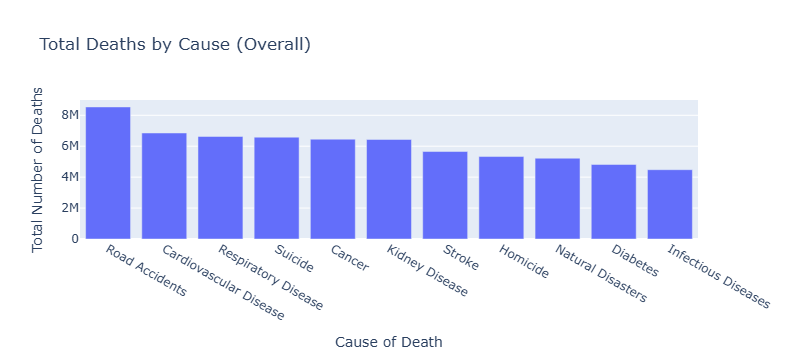

In [4]:
import plotly.express as px

# Aggregate total deaths by cause
cause_deaths = (
    df.groupby("Cause_of_Death")["Number_of_Deaths"]
      .sum()
      .reset_index()
      .sort_values(by="Number_of_Deaths", ascending=False)
)

# Plot
fig = px.bar(
    cause_deaths,
    x="Cause_of_Death",
    y="Number_of_Deaths",
    title="Total Deaths by Cause (Overall)",
    labels={
        "Cause_of_Death": "Cause of Death",
        "Number_of_Deaths": "Total Number of Deaths"
    }
)

fig.show()

### Insight 1: Dominant Causes of Mortality

The visualization highlights the leading causes of death across all countries,
age groups, and genders.

**Key Takeaways:**
- A small number of causes account for a disproportionately high number of deaths.
- These causes should be prioritized for public health funding and intervention.
- Preventive healthcare, early diagnosis, and awareness programs can significantly
  reduce mortality in these categories.

**Business Impact:**
Healthcare providers, insurance companies, and government bodies can allocate
resources more efficiently by focusing on these high-impact causes.

## Insight 2: Mortality Trend Over Time

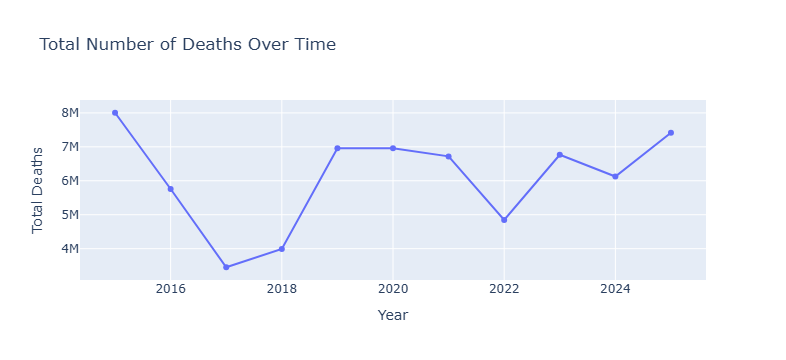

In [5]:
# Aggregate deaths by year
yearly_deaths = (
    df.groupby("Year")["Number_of_Deaths"]
      .sum()
      .reset_index()
)

fig = px.line(
    yearly_deaths,
    x="Year",
    y="Number_of_Deaths",
    markers=True,
    title="Total Number of Deaths Over Time",
    labels={
        "Year": "Year",
        "Number_of_Deaths": "Total Deaths"
    }
)

fig.show()

### Insight 2: Mortality Trend Over Time

The line chart shows the total number of deaths aggregated across all countries and causes from 2015 to 2025.

**Key Observations:**
- The overall mortality trend shows noticeable year-to-year fluctuations rather than a steady increase or decrease.
- Certain years record sharp spikes in total deaths, which may indicate the impact of major events such as pandemics, natural disasters, or socio-economic crises.
- The absence of a consistent downward trend suggests that improvements in healthcare may be uneven across regions and causes of death.

**Business / Policy Implication:**
- Governments and healthcare organizations should focus on early warning systems and year-specific risk mitigation strategies.
- Historical spike years can be analyzed further to identify root causes and improve preparedness for future large-scale health emergencies.

## Insight 3 – Country-wise Mortality Burden

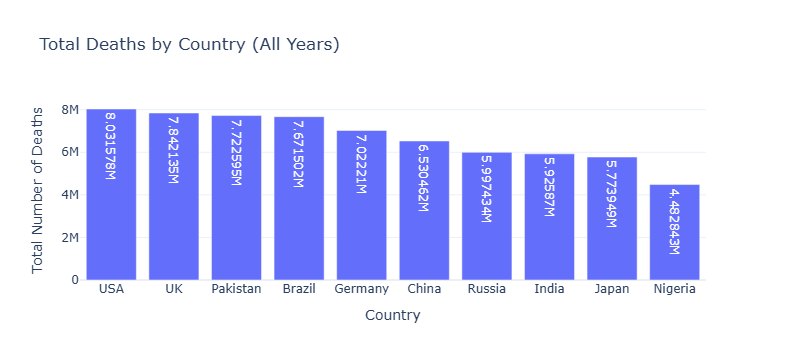

In [6]:
country_deaths = (
    df.groupby("Country")["Number_of_Deaths"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

country_deaths

fig = px.bar(
    country_deaths,
    x="Country",
    y="Number_of_Deaths",
    title="Total Deaths by Country (All Years)",
    text_auto=True
)

fig.update_layout(
    xaxis_title="Country",
    yaxis_title="Total Number of Deaths",
    template="plotly_white"
)

fig.show()

### Insight 3: Country-wise Mortality Burden

This analysis highlights the total number of deaths recorded across different countries
in the dataset.

**Why this matters:**
- Identifies countries with the highest overall mortality burden
- Helps policymakers prioritize healthcare resources
- Useful for comparing public health stress across regions

The visualization below aggregates deaths across all years, genders, age groups, and
causes of death to provide a high-level country-wise comparison.

## Insight 4: Cause of Death by Age Group

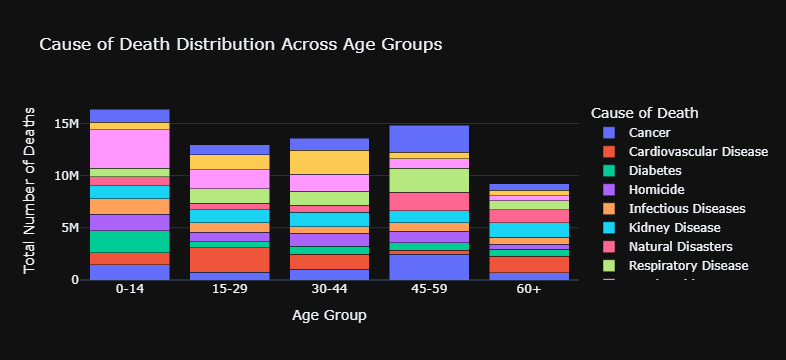

In [10]:
age_cause = (
    df.groupby(["Age_Group", "Cause_of_Death"])["Number_of_Deaths"]
      .sum()
      .reset_index()
)

fig = px.bar(
    age_cause,
    x="Age_Group",
    y="Number_of_Deaths",
    color="Cause_of_Death",
    title="Cause of Death Distribution Across Age Groups",
    labels={
        "Age_Group": "Age Group",
        "Number_of_Deaths": "Total Number of Deaths",
        "Cause_of_Death": "Cause of Death"
    }
)

fig.update_layout(
    template="plotly_dark",
    barmode="stack"
)

fig.show()

### Insight 4: Cause of Death by Age Group

This analysis explores how causes of death vary across different age groups.

**Why this matters:**
- Identifies age-specific health risks
- Helps target preventive healthcare strategies
- Reveals whether certain causes disproportionately affect younger or older populations

Understanding these patterns is critical for designing age-focused public health
interventions rather than one-size-fits-all solutions.

## Insight 5 – Mortality Trends Over Time

This analysis examines how total mortality has changed over the years covered in the dataset.

**Why this matters:**
- Identifies rising or declining mortality trends
- Helps detect unusual spikes that may indicate external events
- Supports long-term public health planning and policy decisions

Trend analysis allows decision-makers to move from reactive responses
to proactive, data-driven interventions.

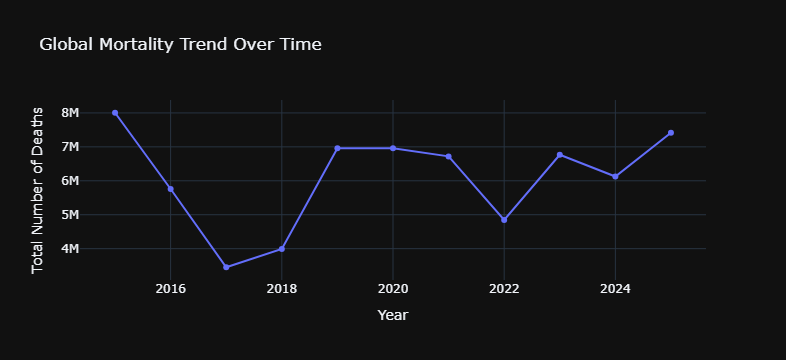

In [12]:
yearly_trend = (
    df.groupby("Year")["Number_of_Deaths"]
      .sum()
      .reset_index()
)

fig = px.line(
    yearly_trend,
    x="Year",
    y="Number_of_Deaths",
    markers=True,
    title="Global Mortality Trend Over Time",
    labels={
        "Year": "Year",
        "Number_of_Deaths": "Total Number of Deaths"
    }
)

fig.update_layout(
    template="plotly_dark"
)

fig.show()

## Insight 5: Gender-wise Mortality Patterns

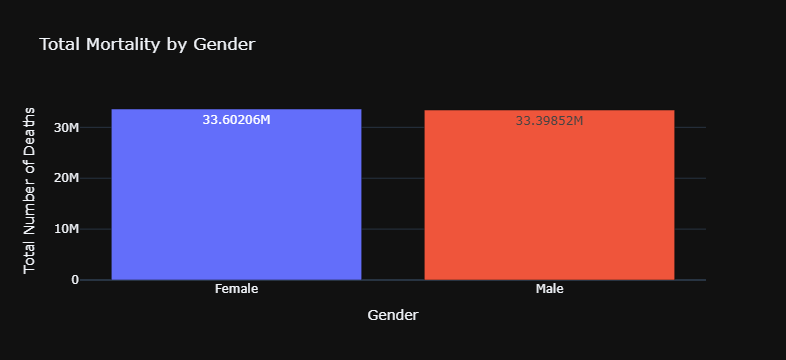

In [13]:
gender_mortality = (
    df.groupby("Gender")["Number_of_Deaths"]
      .sum()
      .reset_index()
)

fig = px.bar(
    gender_mortality,
    x="Gender",
    y="Number_of_Deaths",
    color="Gender",
    title="Total Mortality by Gender",
    text_auto=True
)

fig.update_layout(
    template="plotly_dark",
    showlegend=False,
    xaxis_title="Gender",
    yaxis_title="Total Number of Deaths"
)

fig.show()

### Insight 5: Gender-wise Mortality Patterns

This analysis explores how mortality differs between males and females across
all countries, age groups, and causes of death.

**Why this matters:**
- Highlights gender-specific health risks
- Supports targeted healthcare and awareness campaigns
- Useful for insurance and public health policy planning

Visualizing gender differences helps stakeholders identify groups with
disproportionate health burdens.